In [ ]:
#外框坐标
(362 , 260)
(861 , 759)
# 内角
#第一个卡片左上角,右下角坐标
(364 , 262)
(418 , 316)
#卡片大小
(54, 54)
#每个卡片隔1像素,每三个隔2像素

In [2]:
a=[[364 + 54*i + i + int(i/3)*2,364 + 54*(i+1) + i + int(i/3)*2] for i in range(9)]
b=[[262 + 54*i + i + int(i/3)*2, 262 + 54*(i+1) + i + int(i/3)*2] for i in range(9)]
d=[[((x1,y1),(x2,y2)) for x1,x2 in a] for y1,y2 in b]
d

[[((364, 262), (418, 316)),
  ((419, 262), (473, 316)),
  ((474, 262), (528, 316)),
  ((531, 262), (585, 316)),
  ((586, 262), (640, 316)),
  ((641, 262), (695, 316)),
  ((698, 262), (752, 316)),
  ((753, 262), (807, 316)),
  ((808, 262), (862, 316))],
 [((364, 317), (418, 371)),
  ((419, 317), (473, 371)),
  ((474, 317), (528, 371)),
  ((531, 317), (585, 371)),
  ((586, 317), (640, 371)),
  ((641, 317), (695, 371)),
  ((698, 317), (752, 371)),
  ((753, 317), (807, 371)),
  ((808, 317), (862, 371))],
 [((364, 372), (418, 426)),
  ((419, 372), (473, 426)),
  ((474, 372), (528, 426)),
  ((531, 372), (585, 426)),
  ((586, 372), (640, 426)),
  ((641, 372), (695, 426)),
  ((698, 372), (752, 426)),
  ((753, 372), (807, 426)),
  ((808, 372), (862, 426))],
 [((364, 429), (418, 483)),
  ((419, 429), (473, 483)),
  ((474, 429), (528, 483)),
  ((531, 429), (585, 483)),
  ((586, 429), (640, 483)),
  ((641, 429), (695, 483)),
  ((698, 429), (752, 483)),
  ((753, 429), (807, 483)),
  ((808, 429), (8

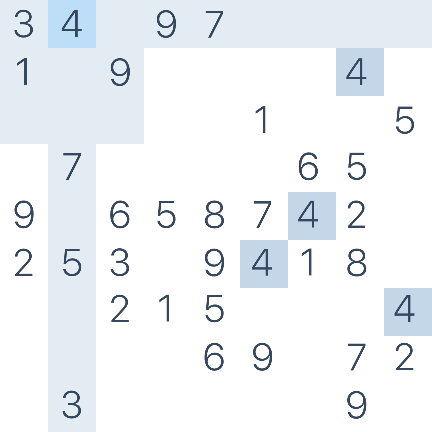

[[3, 4, 0, 9, 7, 0, 0, 0, 0],
 [1, 0, 9, 0, 0, 0, 0, 4, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 5],
 [0, 7, 0, 0, 0, 0, 6, 5, 0],
 [9, 0, 6, 5, 8, 7, 4, 2, 0],
 [2, 5, 3, 0, 9, 4, 1, 8, 0],
 [0, 0, 2, 1, 5, 0, 0, 0, 4],
 [0, 0, 0, 0, 6, 9, 0, 7, 2],
 [0, 3, 0, 0, 0, 0, 0, 9, 0]]

In [6]:
import os
import sys
sys.path.append("/data/users/lic/dev/test/Sudoku")
from PIL import Image, ImageDraw, ImageFont
from src.sudoku.ocr import ocr

firstblocktopleft=364
firstblockbottomright=262
width=heigh=54
a=[[364 + 54*i + i + int(i/3)*2,364 + 54*(i+1) + i + int(i/3)*2] for i in range(9)]
b=[[262 + 54*i + i + int(i/3)*2, 262 + 54*(i+1) + i + int(i/3)*2] for i in range(9)]
d=[[((x1,y1),(x2,y2)) for x1,x2 in a] for y1,y2 in b]

image=Image.new(mode="RGB",size=[1920,1080],color="white")
image=Image.open("/data/users/lic/dev/test/Sudoku/asset/PixPin_2024-02-22_17-07-44.png")
draw=ImageDraw.Draw(image)
imgs=[]
for i in d:
    lines=[]
    for j in i:
        lines.append(image.crop([j[0][0]+3,j[0][1]+3,j[1][0]-3,j[1][1]-3]))
    imgs.append(lines)

# imgs=[[imgs[8][3],imgs[8][1],imgs[4][5],imgs[6][7],imgs[8][8],imgs[7][7],imgs[8][6],imgs[5][8],imgs[5][6]]]
image_width, image_height = imgs[0][0].size
board_image = Image.new('RGB', (image_width * len(imgs[0]), image_height * len(imgs)))
for i in range(len(imgs)):
    for j in range(len(imgs[i])):
        board_image.paste(imgs[i][j], (j * image_width, i * image_height))
display(board_image)
num=[]
for i in imgs:
    num.append(ocr(i))
num

In [9]:
from collections import defaultdict
from copy import deepcopy
from typing import Dict, Tuple
import pandas as pd

def deduction(num:list|pd.DataFrame):

    sudo=deepcopy(num)
    isfindnew=True
    while isfindnew:
        isfindnew=False

        sudo_pos = pd.DataFrame([[[z for z in range(1,10)]for y in range(1,10)]for x in range(1,10)])
        for (x,v) in enumerate(sudo):
            for (y,v) in enumerate(v):
                if v != 0:
                    sudo_pos.loc[x,y]=v
                    sudo_pos.loc[x,:].apply(lambda x:x.remove(v) if isinstance(x,list) and v in x else (x))
                    sudo_pos.loc[:,y].apply(lambda x:x.remove(v) if isinstance(x,list) and v in x else (x))
                    for x1 in range(3):
                        for y1 in range(3):
                            # print((int(x/3)*3+x1,int(y/3)*3+y1))
                            if isinstance(sudo_pos.loc[int(x/3)*3+x1,int(y/3)*3+y1],list) and v in sudo_pos.loc[int(x/3)*3+x1,int(y/3)*3+y1]:
                                sudo_pos.loc[int(x/3)*3+x1,int(y/3)*3+y1].remove(v)

        line_possibility=defaultdict(lambda:defaultdict(list))
        row_possibility=defaultdict(lambda:defaultdict(list))
        square_possibility=defaultdict(lambda:defaultdict(list))
        for x in range(9):
            for y in range(9):
                if isinstance(sudo_pos.loc[x,y],list) and len(sudo_pos.loc[x,y]) == 1:
                    sudo[x][y]=sudo_pos.loc[x,y][0]
                    # print((x,y),sudo_pos.loc[x,y])
                    line_possibility[x][sudo[x][y]]=y
                    row_possibility[y][sudo[x][y]]=x
                    square_possibility[int(x/3)*3+int(y/3)][sudo[x][y]]=y%3+int(x%3)*3
                    isfindnew=True
                elif isinstance(sudo_pos.loc[x,y],int):
                    line_possibility[x][sudo[x][y]]=y
                    row_possibility[y][sudo[x][y]]=x
                    square_possibility[int(x/3)*3+int(y/3)][sudo[x][y]]=y%3+int(x%3)*3
                else:
                    for i in sudo_pos.loc[x,y]:
                        if isinstance(line_possibility[x][i],list):
                            line_possibility[x][i].append(y)
                        if isinstance(row_possibility[y][i],list):
                            row_possibility[y][i].append(x)
                        if isinstance(square_possibility[int(x/3)*3+int(y/3)][i],list):
                            square_possibility[int(x/3)*3+int(y/3)][i].append(y%3+int(x%3)*3)
        for x in range(9):
            for y in range(1,10):
                if isinstance(line_possibility[x][y],list) and len(line_possibility[x][y]) == 1:
                    line_possibility[x][y] = line_possibility[x][y][0]
                    sudo[x][line_possibility[x][y]]=y
                    isfindnew=True
                if isinstance(row_possibility[x][y],list) and len(row_possibility[x][y]) == 1:
                    row_possibility[x][y] = row_possibility[x][y][0]
                    sudo[row_possibility[x][y]][x]=y
                    isfindnew=True
                if isinstance(square_possibility[x][y],list) and len(square_possibility[x][y]) == 1:
                    square_possibility[x][y] = square_possibility[x][y][0]
                    sudo[int(x/3)*3+int(square_possibility[x][y]/3)][x%3*3+square_possibility[x][y]%3]=y
                    isfindnew=True
    return sudo,sudo_pos

class gusstree:
    sudo_pos:pd.DataFrame
    children_nodes:Dict[Tuple[int, int, int], "gusstree"]
    parent_node:"gusstree"

    def __init__(self,sudo_pos:pd.DataFrame) -> None:
        self.sudo_pos = sudo_pos
        self.sudo = [v for k,v in sudo_pos.T.map(lambda x: 0 if isinstance(x, list) else x).to_dict("list").items()]

    def exec(self):
        if self.sudo_pos.map(lambda x:isinstance(x,int)).all().all():
            return self.sudo_pos,True
        if self.sudo_pos.map(lambda x:x==[]).any().any():
            return self.sudo_pos,False
        for record in [(row, col) for row in range(len(self.sudo_pos)) for col in range(len(self.sudo_pos.columns)) if isinstance(self.sudo_pos.iloc[row, col], list)]:
            sudo = deepcopy(self.sudo)
            for value in self.sudo_pos.loc[*record]:
                sudo[record[0]][record[1]]=value
                print((record[0],record[1]),value)
                sudo,sudo_pos=deduction(sudo)
                sudo_pos,result=gusstree(sudo_pos).exec()
                if result:
                    return sudo_pos,result

sudo = gusstree(deduction(num)[1]).exec()[0]

In [16]:
def finish(num:list,sudo:pd.DataFrame):
    sudo_ori=pd.DataFrame(num)
    # print(sudo[sudo_ori==0])
    a=[[364 + 54*i + i + int(i/3)*2,364 + 54*(i+1) + i + int(i/3)*2] for i in range(9)]
    b=[[262 + 54*i + i + int(i/3)*2, 262 + 54*(i+1) + i + int(i/3)*2] for i in range(9)]
    d=[[((x1,y1),(x2,y2)) for x1,x2 in a] for y1,y2 in b]
    d=pd.DataFrame([[(int((y[0][0]+y[1][0])/2),int((y[0][1]+y[1][1])/2)) for y in x]for x in d])
    display(d)
finish(num,sudo)

,0,1,2,3,4,5,6,7,8
0,"(391, 289)","(446, 289)","(501, 289)","(558, 289)","(613, 289)","(668, 289)","(725, 289)","(780, 289)","(835, 289)"
1,"(391, 344)","(446, 344)","(501, 344)","(558, 344)","(613, 344)","(668, 344)","(725, 344)","(780, 344)","(835, 344)"
2,"(391, 399)","(446, 399)","(501, 399)","(558, 399)","(613, 399)","(668, 399)","(725, 399)","(780, 399)","(835, 399)"
3,"(391, 456)","(446, 456)","(501, 456)","(558, 456)","(613, 456)","(668, 456)","(725, 456)","(780, 456)","(835, 456)"
4,"(391, 511)","(446, 511)","(501, 511)","(558, 511)","(613, 511)","(668, 511)","(725, 511)","(780, 511)","(835, 511)"
5,"(391, 566)","(446, 566)","(501, 566)","(558, 566)","(613, 566)","(668, 566)","(725, 566)","(780, 566)","(835, 566)"
6,"(391, 623)","(446, 623)","(501, 623)","(558, 623)","(613, 623)","(668, 623)","(725, 623)","(780, 623)","(835, 623)"
7,"(391, 678)","(446, 678)","(501, 678)","(558, 678)","(613, 678)","(668, 678)","(725, 678)","(780, 678)","(835, 678)"
8,"(391, 733)","(446, 733)","(501, 733)","(558, 733)","(613, 733)","(668, 733)","(725, 733)","(780, 733)","(835, 733)"


In [19]:
pos=[[940,1053,1167],[410,522,635]]
{n:(pos[0][(n-1)%3],pos[1][int((n-1)/3)]) for n in range(1,10)}

{1: (940, 410),
 2: (1053, 410),
 3: (1167, 410),
 4: (940, 522),
 5: (1053, 522),
 6: (1167, 522),
 7: (940, 635),
 8: (1053, 635),
 9: (1167, 635)}

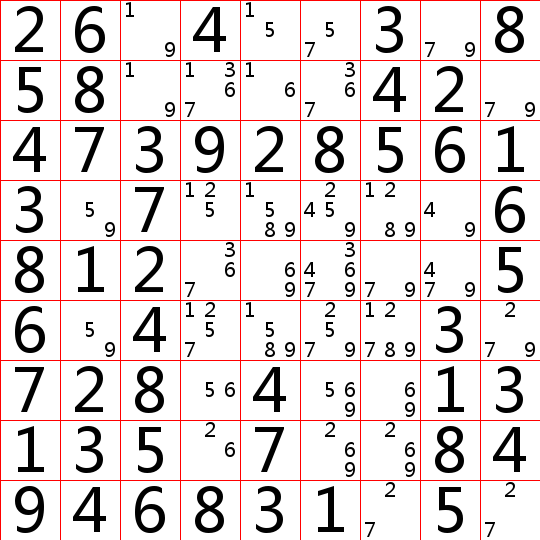

In [48]:
def drawguess(sudo:pd.DataFrame):
    def getpic(v):
        result = Image.new("RGB",(60,60),(255,255,255))
        font = ImageFont.truetype("/data/users/lic/dev/test/Sudoku/微软雅黑.ttf",size=20)
        font1 = ImageFont.truetype("/data/users/lic/dev/test/Sudoku/微软雅黑.ttf",size=60)
        draw = ImageDraw.Draw(result)
        if isinstance(v,list):
            for i in v:
                draw.text((((i-1)%3)*20+4,int((i-1)/3)*20-5),f"{i}",(0,0,0),font)
        else:
            draw.text((12,-12),f"{v}",(0,0,0),font1)
        draw.rectangle((0,0,60,60),outline="red")
        return result
    d=[]
    for k,v in sudo.apply(lambda x:x.apply(getpic)).to_dict("list").items():
        d.append(v)
    image_width=image_height = 60
    board_image = Image.new('RGB', (image_width * len(d[0]), image_height * len(d)))
    for i in range(len(d)):
        for j in range(len(d[i])):
            board_image.paste(d[j][i], (j * image_width, i * image_height))
    display(board_image)